load shapefile with geopandas

  NUTS_ID  LEVL_CODE CNTR_CODE            NAME_LATN            NUTS_NAME  \
0   CH011          3        CH                 Vaud                 Vaud   
1   CH012          3        CH      Valais / Wallis      Valais / Wallis   
2   CH013          3        CH               Genève               Genève   
3   CH021          3        CH         Bern / Berne         Bern / Berne   
4   CH022          3        CH  Fribourg / Freiburg  Fribourg / Freiburg   

   MOUNT_TYPE  URBN_TYPE  COAST_TYPE  \
0         NaN        NaN         NaN   
1         NaN        NaN         NaN   
2         NaN        NaN         NaN   
3         NaN        NaN         NaN   
4         NaN        NaN         NaN   

                                            geometry  
0  MULTIPOLYGON (((4076472.869 2595665.686, 40522...  
1  POLYGON ((4199212.266 2616819.793, 4204089.611...  
2  POLYGON ((4008290.646 2566176.765, 4022416.075...  
3  POLYGON ((4096552.98 2655973.06, 4095661.265 2...  
4  POLYGON ((4096552.98 265

<Axes: >

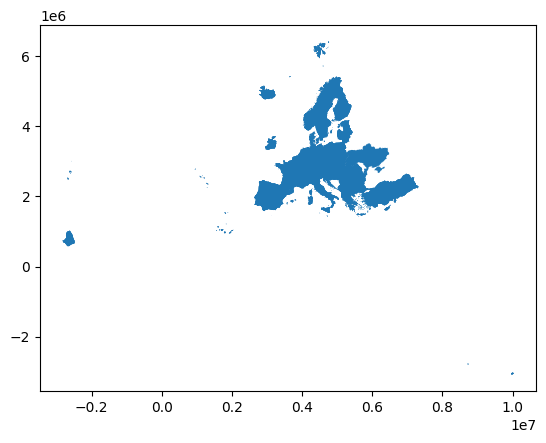

In [11]:
import geopandas as gpd

file_path = 'NUTS_RG_20M_2024_3035.shp.zip'

gdf = gpd.read_file(file_path)

print(gdf.head())
gdf.plot()


find polygons for gps location

In [12]:
from shapely.geometry import Point

gps_location = Point(9.692639, 53.463611)  # Buxtehude
point = Point(gps_location)

In [13]:
print(gdf.crs)

EPSG:3035


In [14]:
if gdf.crs.to_epsg() != 4326:  # EPSG 4326 is WGS 84 for GPS
    point = gpd.GeoSeries([point], crs="EPSG:4326").to_crs(gdf.crs).iloc[0]


In [15]:
# Find polygons containing the point
polygons_containing_point = gdf[gdf.contains(point)]

# Display the results
print(polygons_containing_point)

     NUTS_ID  LEVL_CODE CNTR_CODE      NAME_LATN      NUTS_NAME  MOUNT_TYPE  \
422    DE939          3        DE          Stade          Stade         NaN   
1361    DE93          2        DE       Lüneburg       Lüneburg         NaN   
1645      DE          0        DE    Deutschland    Deutschland         NaN   
1711     DE9          1        DE  Niedersachsen  Niedersachsen         NaN   

      URBN_TYPE  COAST_TYPE                                           geometry  
422         NaN         NaN  POLYGON ((4291868.167 3358929.335, 4280417.522...  
1361        NaN         NaN  POLYGON ((4232319.832 3420397.384, 4257112.328...  
1645        NaN         NaN  MULTIPOLYGON (((4264045.794 3530123.451, 42756...  
1711        NaN         NaN  MULTIPOLYGON (((4232319.832 3420397.384, 42571...  


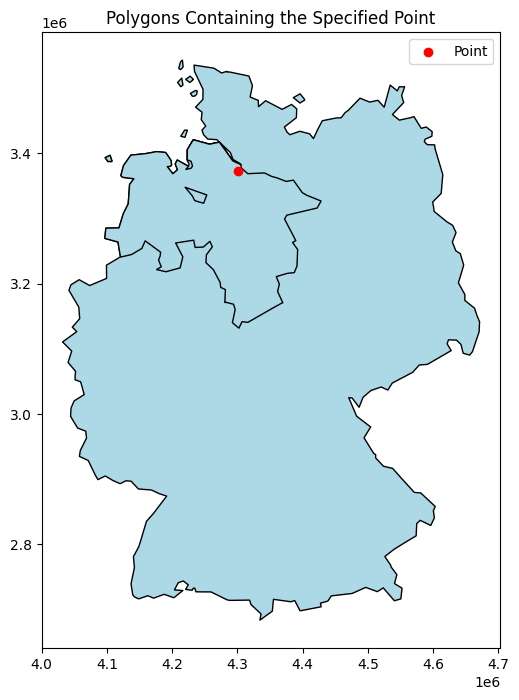

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
polygons_containing_point.plot(ax=ax, color="lightblue", edgecolor="black")
plt.scatter(point.x, point.y, color="red", label="Point", zorder=5)
plt.legend()
plt.title("Polygons Containing the Specified Point")
plt.show()
